<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/Phy_lab_dipoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [ ]:
# import the math module
import math

def Epoint(q, x, X, Y):
    return q * np.asarray([(X-x[0]), (Y-x[1])]) /( (X-x[0])**2 + (Y-x[1])**2 )

def Epoint3(q, x, X, Y, Z):
    return q * np.asarray([(X-x[0]), (Y-x[1]), (Z-x[2])]) /( (X-x[0])**2 + (Y-x[1])**2 + (Z-x[2])**2 )

def Field_3D(q, x, X, Y, Z):
    XYZ = np.asarray([X,Y,Z])
    R = XYZ - x[:,None, None, None]
    return q*R / (np.linalg.norm(R, axis = 0))**3

def Field_2D(q, x, X, Y):
    XY = np.asarray([X,Y])
    R = XY - x[:,None, None]
    return q*(R) / np.linalg.norm(R, axis = 0) ** 3

def Potential_2D(q, x, X, Y):
    XY = np.asarray([X,Y])
    R = XY - x[:,None, None]
    return q / np.linalg.norm(R, axis = 0)

def Potential_3D(q, x, X, Y, Z):
    XYZ = np.asarray([X,Y,Z])
    R = XYZ - x[:,None, None, None]
    return q / np.linalg.norm(R, axis = 0)

def Potential_3D_Nq(q, x, X, Y, Z):
    XYZ     = np.asarray([X,Y,Z])
    P_out   = np.zeros(XYZ.shape)
    for i in range(len(q)):
        R = XYZ - x[i][:,None, None, None]
        P_out += q[i] / np.linalg.norm(R, axis = 0)
    return P_out[0,:,:,:]

def EEpoint3N(q, x, X, Y, Z):
    XYZ   = np.asarray([X,Y,Z])
    E_out = np.zeros(XYZ.shape)
    for i in range(len(q)):
        R = XYZ - x[i][:,None, None, None]
        E_out += q[i]*(R) / np.linalg.norm(R, axis = 0)**3
    return E_out

def grad(s):
    gradient = np.empty([s.ndim] + list(s.shape), dtype=s.dtype)
    for i in range(s.ndim):
        gradient[i] = np.gradient(s, axis=i)
    return gradient

# $k = \frac{1}{4\pi \varepsilon_0}$, $\varepsilon_0 = 1 ⇒ k = \frac{1}{4\pi}$

# 1. 1 Charge

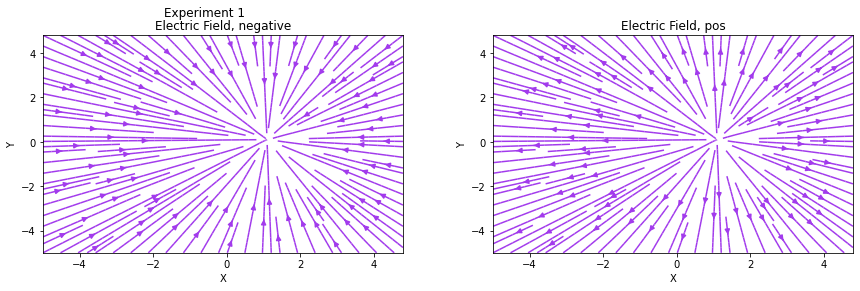

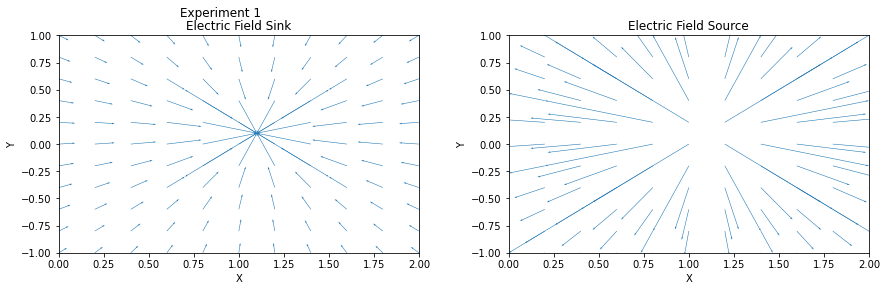

In [ ]:

# Assign vector directions
dx = .2
x1 = np.array([1.+dx/2, 0+dx/2])
qa = 1
qb = -1
X,Y = np.meshgrid(np.arange(-5,5,.2),np.arange(-5,5,.2))
Exy = Epoint(-1., x1, X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.streamplot(X,Y,Exy[0],Exy[1], density=1.4, linewidth=None, color='#A23BEC')
ax1.set_title("Electric Field, negative")
ax1.set(xlabel="X", ylabel="Y")

Exy = Epoint(2., x1, X, Y)

ax2.streamplot(X,Y,Exy[0],Exy[1], density=1.4, linewidth=None, color='#A23BEC')
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field, pos")
fig.show()

Exy = Epoint(-1., x1, X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.quiver(X,Y,Exy[0],Exy[1], color="C0", angles='xy', scale_units='xy', scale=10, width=.0015)
ax1.set_title("Electric Field Sink")
ax1.set(xlabel="X", ylabel="Y")
ax1.set_xlim([0,2])
ax1.set_ylim([-1,1])

Exy = Epoint(2., x1, X, Y)

ax2.quiver(X,Y,Exy[0],Exy[1], color="C0", angles='xy', scale_units='xy', scale=10, width=.0015)
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field Source")
ax2.set_xlim([0,2])
ax2.set_ylim([-1,1])
fig.show()

# Review

In [ ]:
def grad(s):
    gradient = np.empty([s.ndim] + list(s.shape), dtype=s.dtype)
    for i in range(s.ndim):
        gradient[i] = np.gradient(s, axis=i)
    return gradient

Suppose we had a field with domain $X, Y, Z$ with a point charge of charge $q$ with cooridnates $x,y,z$. Then:

$\mathcal{E}(E) \propto \frac{\hat{R}}{|R|} = \frac{\hat{R}}{|R|^2}$

$\mathcal{E}(R) = \frac{1}{4\pi ɛ_0} \frac{q}{(X-x)^2 + (Y-x)^2 + (Z-z)^2} \begin{pmatrix} X - x \\ Y - y \\ Z - z \end{pmatrix} = \frac{1}{4\pi ɛ_0} \frac{q}{|R|^2}\,R$.         Electric Field of Point Charge

$\phi(R) = \frac{1}{4\pi ɛ_0} \frac{q}{\sqrt{(X-x)^2 + (Y-x)^2 + (Z-z)^2}} = \frac{1}{4\pi ɛ_0} \frac{q}{|R|} $,      Electric Potential of Point Charge

and let $R = \begin{pmatrix} X - x \\ Y - y \\ Z - z \end{pmatrix}$

$\hat{R} = \frac{\vec{R}}{|R|} = \frac{R_x\hat{i} + R_y\hat{j} + R_z\hat{k}}{\sqrt{(R_x)^2 + (R_y)^2 + (R_z)^2}}$

$R_x =(X-x), R_y =(Y-y),R_z =(Z-z)$

$\hat{i}=\begin{bmatrix}1\\0\\0\\ \end{bmatrix},\hat{j}=\begin{bmatrix}0\\1\\0\\ \end{bmatrix},\hat{k}=\begin{bmatrix}0\\0\\1\\ \end{bmatrix} $

$\hat{R} = \frac{\begin{bmatrix}X-x\\Y-y\\Z-z\end{bmatrix}}{\sqrt{(X-x)^2 + (Y-y)^2 + (Z-z)^2}}$

$\vec{E}=k \times \frac{q}{(\sqrt{(X-x)^2 + (Y-x)^2 + (Z-z)^2} )^ 2}\times   \frac{\begin{bmatrix}X-x\\Y-y\\Z-z\end{bmatrix}}{\sqrt{(X-x)^2 + (Y-y)^2 + (Z-z)^2}} = k \times \frac{q  \times  \begin{bmatrix}X-x\\Y-y\\Z-z\end{bmatrix}}{(\sqrt{(X-x)^2 + (Y-x)^2 + (Z-z)^2} )^ 3} $

In [ ]:
dx = .2
x3 = np.array([0+ dx/2 ,0 + dx/2 ,0 + dx/2])

# Make the grid/"domain"
XYZ  = np.asarray( np.meshgrid(np.arange(dx,2 , dx), np.arange(dx,2, dx), np.arange(dx,2, dx)) )

ExXYZ = (XYZ - x3[:,None, None, None]) / np.linalg.norm(XYZ, axis = 0)


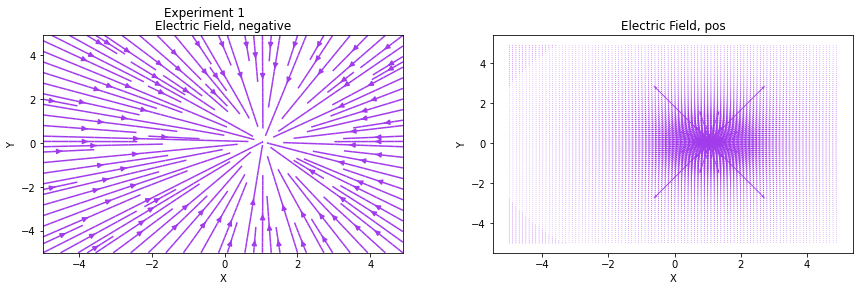

In [ ]:


# 1D arrays
dx = 0.1
x  = np.arange(-5,5,dx) ## cm
y  = np.arange(-5,5,dx)

# Meshgrid
X,Y = np.meshgrid(x,y) ## make field domain

# Assign vector directions
x1 = np.array([1.+dx/2, 0+dx/2])

Exy = Epoint(-1., x1, X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.streamplot(X,Y,Exy[0],Exy[1], density=1.4, linewidth=None, color='#A23BEC')
ax1.set_title("Electric Field, negative")
ax1.set(xlabel="X", ylabel="Y")

ax2.quiver(X,Y,Exy[0],Exy[1], linewidth=None, color='#A23BEC')
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field, pos")
fig.show()

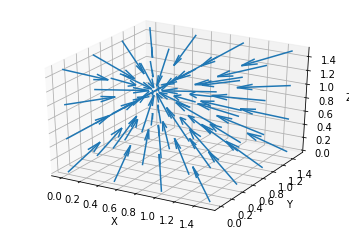

In [ ]:
x3 = np.array([0.5,0.75,1.])

# Make the grid/"domain"
X, Y, Z = np.meshgrid(np.arange(0, 2, 0.5),
                      np.arange(0, 2, 0.5),
                      np.arange(0, 2, 0.5))

E_xXYZ = Field_3D(-1, x3, X, Y, Z)

ax = plt.figure().add_subplot(projection='3d')

ax.quiver(X, Y, Z, E_xXYZ[0], E_xXYZ[1], E_xXYZ[2], length=.5, normalize=True)
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
plt.show()




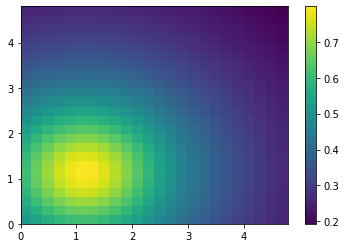

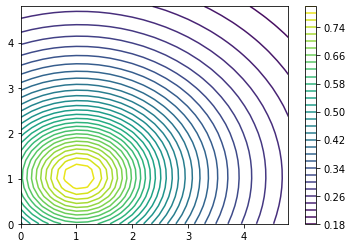

In [ ]:
x1 = np.array([1+dx/2,1+dx/2,2+dx/2])
x2 = np.array([3+dx/2,3+dx/2,2+dx/2])
dx = .2
X, Y, Z = np.meshgrid(np.arange(0, 5, dx),
                      np.arange(0, 5,dx),
                      np.arange(0, 5, dx))

φ = Potential_3D(1, x1, X, Y, Z)

# Make the plot
s = 4
plt.pcolormesh(X[:, :, s], Y[:, :, s], φ[:, :, s], shading='auto')
plt.colorbar()
plt.show()

plt.contour(X[:, :, s], Y[:, :, s], φ[:, :, s], 31)
plt.colorbar()
plt.show()

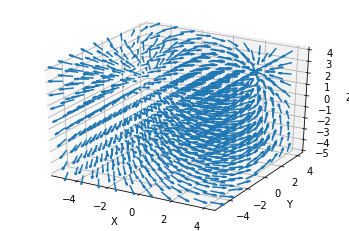

In [ ]:
dx = 1
x1 = np.array([2+dx/2,2+dx/2,2+dx/2])
x2 = np.array([-2+dx/2,-2+dx/2,2+dx/2])


# Make the grid/"domain"
X, Y, Z = np.meshgrid(np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx))

E_xXYZ = Field_3D(-.1, x1, X, Y, Z) + Field_3D(.1, x2, X, Y, Z)

ax = plt.figure().add_subplot(projection='3d')

ax.quiver(X, Y, Z, E_xXYZ[0], E_xXYZ[1], E_xXYZ[2], length=.8, normalize=True)
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
plt.show()


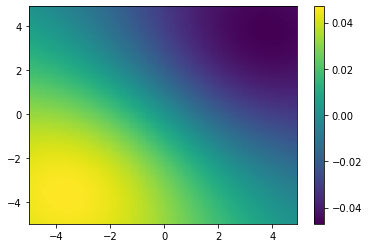

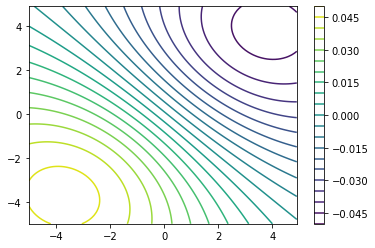

In [ ]:
dx = .1
x1 = np.array([2+dx/2,2+dx/2,2+dx/2])
x2 = np.array([-2+dx/2,-2+dx/2,2+dx/2])


# Make the grid/"domain"
X, Y, Z = np.meshgrid(np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx))
φ  = Potential_3D(-1, x1, X, Y, Z) + Potential_3D(1, x2, X, Y, Z)

# Make the plot
s = 5
plt.pcolormesh(X[:, :, s], Y[:, :, s], φ[:, :, s], shading='auto')
plt.colorbar()
plt.show()

plt.contour(X[:, :, s], Y[:, :, s], φ[:, :, s], 20)
plt.colorbar()
plt.show()

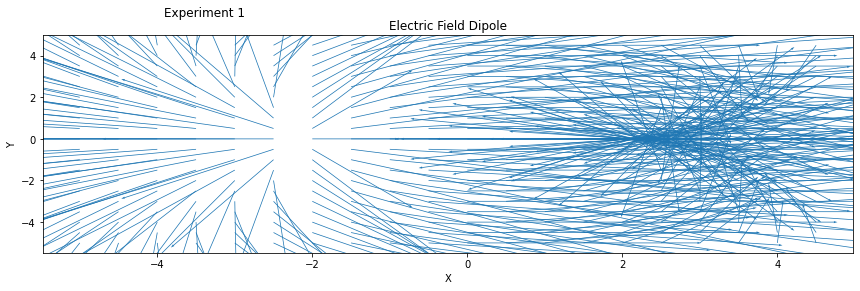

In [ ]:
dx = .5
X, Y, Z = np.meshgrid(np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx))
x1 = np.array([0.3,0,0])
x2 = np.array([-0.3,0,0])
E_xXYZ = Field_3D(-1, x1, X, Y, Z) + Field_3D(1, x2, X, Y, Z)

fig, (ax2) = plt.subplots(1, 1)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=1, wspace=25, right=2)

s = 4

ax2.quiver(X[:, :, s], Y[:, :, s], E_xXYZ[0, :, :, s], E_xXYZ[1,:, :, s], color="C0", angles='xy', scale_units='xy', scale=.001, width=.0009)
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field Dipole")
fig.show()

N point particles

In [ ]:

q_i  = np.array([1, -1])
R_ix = np.array([[0, 1.05, 0.], [0, -1.05, 0.]])

EEpoint3N(q_i, R_ix, X, Y, Z).shape

(3, 20, 20, 20)

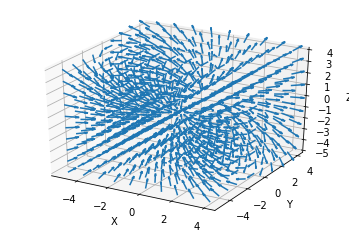

In [ ]:
dx = 1
q_i  = np.array([1, -1])
R_ix = np.array([[0, 1.05, 0.], [0, -1.05, 0.]])


# Make the grid/"domain"
X, Y, Z = np.meshgrid(np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx),
                      np.arange(-5, 5, dx))

E_NXYZ = EEpoint3N(q_i, R_ix, X, Y, Z)

ax = plt.figure().add_subplot(projection='3d')

ax.quiver(X, Y, Z, E_NXYZ[0], E_NXYZ[1], E_NXYZ[2], length=.8, normalize=True)
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
plt.show()

##1. 2D quiver plot E field + single point particle

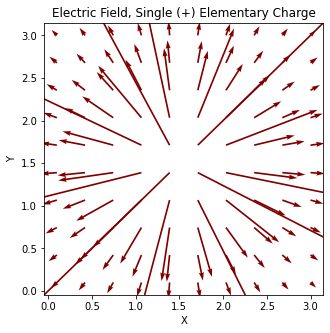

In [ ]:

dx = 10
# Make the grid/"domain"
X, Y= np.meshgrid(np.linspace(0.1, 3, dx),
                  np.linspace(0.1, 3, dx))
x1 = np.array([1.5,1.5])

Single_point_charge = Field_2D(1,x1,X,Y)

fig, ax = plt.subplots(figsize = (5,5))

ax.quiver(X,Y,Single_point_charge[0],Single_point_charge[1], angles='xy', scale_units='xy', scale=2.7, color = 'maroon',)

ax.set_title('Electric Field, Single (+) Elementary Charge')
ax.set(xlabel="X", ylabel="Y")


plt.show()

#2. 2D contour plot Potential + single point particle


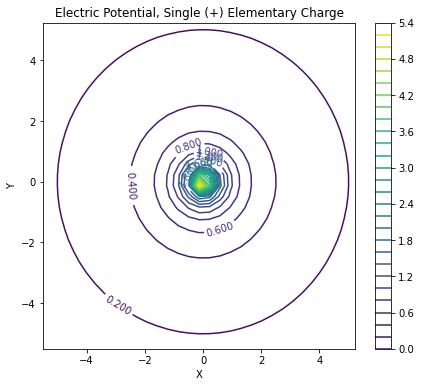

In [ ]:

dx = .35793
# Make the grid/"domain"
start = -5.5
stop = 5.5
X, Y = np.meshgrid(np.arange(start, stop, dx),
                     np.arange(start, stop, dx))
x1 = np.array([(stop + start)/2,(stop + start)/2])

Single_point_charge = Potential_2D(1,x1,X,Y)
fig, ax = plt.subplots(figsize = (7,6))


cs = plt.contour(X,Y,Single_point_charge, levels =30)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Electric Potential, Single (+) Elementary Charge')
ax.set(xlabel="X", ylabel="Y")#,xlim =(40, 44), ylim =(40, 44))
plt.colorbar()
plt.show()

#3. 2D quiver plot E field - single point particle




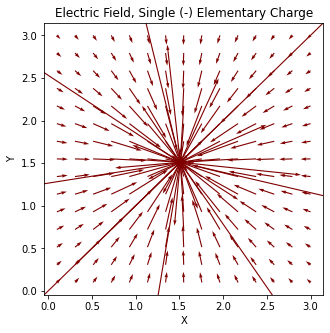

In [ ]:
dx = 15
# Make the grid/"domain"
X, Y= np.meshgrid(np.linspace(0.1, 3, dx),
                  np.linspace(0.1, 3, dx))
x1 = np.array([1.51,1.51])

Single_point_charge = Field_2D(-1,x1,X,Y)

fig, ax = plt.subplots(figsize = (5,5))

ax.quiver(X,Y,Single_point_charge[0],Single_point_charge[1], angles='xy', scale_units='xy', scale=4, color = 'maroon')

ax.set_title('Electric Field, Single (-) Elementary Charge')
ax.set(xlabel="X", ylabel="Y")


plt.show()

#4. 2D contour plot Potential - single point particle


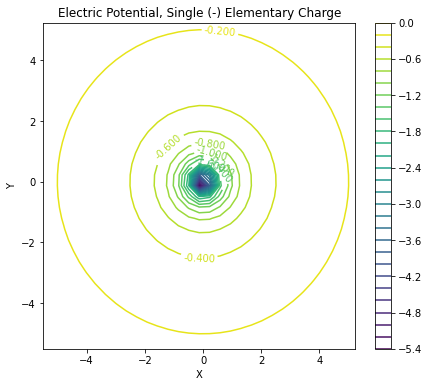

In [ ]:
dx = .35793
# Make the grid/"domain"
start = -5.5
stop = 5.5
X, Y = np.meshgrid(np.arange(start, stop, dx),
                     np.arange(start, stop, dx))
x1 = np.array([(stop + start)/2,(stop + start)/2])

Single_point_charge = Potential_2D(-1,x1,X,Y)
fig, ax = plt.subplots(figsize = (7,6))


cs = plt.contour(X,Y,Single_point_charge, levels =30)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Electric Potential, Single (-) Elementary Charge')
ax.set(xlabel="X", ylabel="Y")#,xlim =(40, 44), ylim =(40, 44))
plt.colorbar()
plt.show()

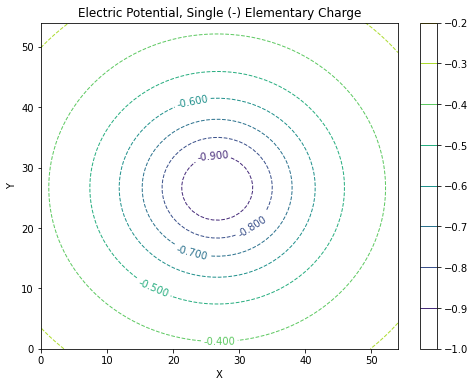

In [ ]:

dx = .09
# Make the grid/"domain"
X, Y, Z= np.meshgrid(np.arange(0.1, 5, dx),
                     np.arange(0.1, 5, dx),
                     np.arange(0.1,5,dx))
x1 = np.array([(2.5),(2.5),(0)])

Single_point_charge = Potential_3D(-1,x1,X,Y,Z)

fig, ax = plt.subplots(figsize = (8,6))


cs = plt.contour(Single_point_charge[:,:,10], levels = 8, linewidths = 1,linestyles = 'dashed')
ax.clabel(cs, inline=True, fontsize=10)
ax.set_title('Electric Potential, Single (-) Elementary Charge')
ax.set(xlabel="X", ylabel="Y")
ax.set
plt.colorbar()
plt.show()

#5. 3D quiver plot single E field dipole particle

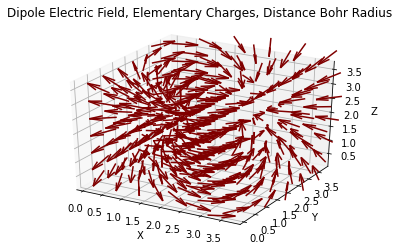

In [ ]:
#re-adjusting the spacing for 3d plots:
dx = .6
# Make the grid/"domain"
X, Y, Z= np.meshgrid(np.arange(0.1, 4.1, dx),
                     np.arange(0.1, 4.1, dx),
                     np.arange(0.1,4.1,dx),indexing='ij')
q = np.array([1,-1])
x1 = np.array([[1+math.sqrt(2)/2,1+math.sqrt(2)/2,1+math.sqrt(2)],[1+math.sqrt(2),1+math.sqrt(2),1+math.sqrt(2)]])

Dipole_Field = EEpoint3N(q,x1,X,Y,Z)

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(X,Y,Z,Dipole_Field[0],Dipole_Field[1],Dipole_Field[2], color ='maroon',length=.6, arrow_length_ratio=.5, normalize=True,pivot='tip',)
ax.set(title = 'Dipole Electric Field, Elementary Charges, Distance Bohr Radius\n')
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
plt.show()

#6.   Obtain 3D **Potential** dipole particle (dont plot)

In [ ]:
dx = .2
# Make the grid/"domain"
X, Y, Z= np.meshgrid(np.arange(0.1, 4.1, dx),
                     np.arange(0.1, 4.1, dx),
                     np.arange(0.1,4.1,dx),indexing='ij')
Dipole_potential = Potential_3D_Nq(q,x1,X,Y,Z)

#7.   take the negative of gradient potential show its equal to **E field**

In [ ]:
Dipole_Field = EEpoint3N(q,x1,X,Y,Z)
neg_gradf_s = -1 * np.array(np.gradient(Dipole_potential,dx))

In [ ]:
print(np.any(np.isclose(neg_gradf_s,Dipole_Field))) #is gradient equal to field w/ spacing?



True


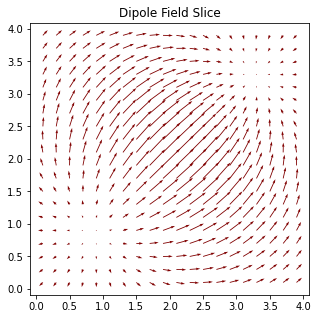

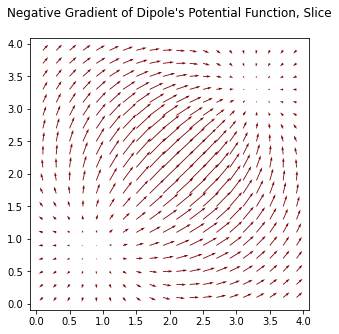

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax.quiver(X[:,:,0],Y[:,:,0],Dipole_Field[0,:,:,0],Dipole_Field[1,:,:,0],angles='xy', scale_units='xy', scale=.2, color = 'maroon',)
ax.set(title = 'Dipole Field Slice')
#plt.show()

fig, ax2 = plt.subplots(figsize = (5,5))
ax2.quiver(X[:,:,0],Y[:,:,0],neg_gradf_s[0,:,:,0], neg_gradf_s[1,:,:,0], angles='xy', scale_units='xy', scale=.2, color = 'maroon',)
ax2.set_title('Negative Gradient of Dipole\'s Potential Function, Slice\n');
#plt.show



 $-\nabla(\phi(X,Y,Z))$ is equal to $\mathcal{E}(X,Y,Z) $ here within a tolerance. We can see from a comparision of a slice from their respective 3D quiver plots that the two arrays do indeed describe the same object.

#8. Slice 3D potential, and plot contour

In [ ]:
#re-adjusting the spacing for countour:
dx = .1
# Make the grid/"domain"
X, Y, Z= np.meshgrid(np.arange(0.1, 4.1, dx),
                     np.arange(0.1, 4.1, dx),
                     np.arange(0.1,4.1,dx))
q = np.array([1,-1])
x1 = np.array([[1+math.sqrt(2)/2,1+math.sqrt(2)/2,1+math.sqrt(2)/2],[1+math.sqrt(2),1+math.sqrt(2),1+math.sqrt(2)/2]])
Dipole_potential = Potential_3D_Nq(q,x1,X,Y,Z)

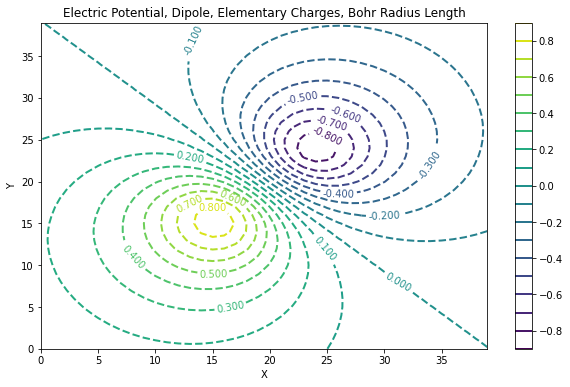

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))


cs = plt.contour(Dipole_potential[:,:,22], levels = 17, linewidths = 2,linestyles = 'dashed')
ax.clabel(cs, inline=True, fontsize=10)
ax.set_title('Electric Potential, Dipole, Elementary Charges, Bohr Radius Length')
ax.set(xlabel="X", ylabel="Y")
ax.set
plt.colorbar()
plt.show()